In [1]:
import re
import os
import json
import numpy as np
import pandas as pd
import os.path as op
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import pearsonr, spearmanr

In [2]:
def load_learning_curve(
    directory, model="CNN", mse=True, test_set="0", y_hat_label="y_hat_std", y_t_label="y_T", what=2
):
    files = list(filter(lambda x: ".json" in x, [a for a in os.walk(directory)][0][2]))
    filtered = list(filter(lambda x: "-u" in x if mse else "-u" not in x, files))
    filtered = list(filter(lambda x: model in x, filtered))
    ordered = list(
        sorted(
            filtered, 
            key=lambda x: float(x.split("-")[what])
        )
    )
    proportions = [float(a.split("-")[what]) for a in ordered]
    contents = [json.loads(open(op.join(directory, a), "r").read()) for a in ordered]
    scc_test = [a["validation"][test_set]["metric"][-1] for a in contents]
    mean_stds = [np.mean(a[y_hat_label]) for a in contents]
    training_set_sizes = [len(a[y_t_label]) for a in contents]
    return(ordered, proportions, contents, scc_test, mean_stds, training_set_sizes)

In [3]:
deephf_wt = load_learning_curve("../models/DeepHF_LC/WT/", "CNN", True)
deephf_esp = load_learning_curve("../models/DeepHF_LC/eSpCas9/", "CNN", True)
deephf_sp = load_learning_curve("../models/DeepHF_LC/SpCas9HF1/", "CNN", True)
gecrispr = load_learning_curve("../models/geCRISPR_LC", "CNN", True, y_t_label="y_T")
deepcpf1_1 = load_learning_curve("../models/DeepCpf1_LC", "CNN", True, "0", "y_hat_std_H1")
deepcpf1_2 = load_learning_curve("../models/DeepCpf1_LC", "CNN", True, "1", "y_hat_std_H2")
deepcpf1_3 = load_learning_curve("../models/DeepCpf1_LC", "CNN", True, "2", "y_hat_std_H3")
jost = load_learning_curve("../models/JostEtAl_LC", "RNN", True, y_t_label="y_train")
off_cpf = load_learning_curve("../models/Cpf1_offtargets_LC", "model", True, y_t_label="y_train")
#hl60 = load_learning_curve("../models/DeepCRISPR_LC/hl60", "CNN", False)

In [4]:
%%bash

ls ../models/DeepCRISPR_LC/hl60

CNN-0.05-59.ptch
CNN-0.05-.json
CNN-0.1-59.ptch
CNN-0.1-.json
CNN-0.2-59.ptch
CNN-0.2-.json
CNN-0.3-59.ptch
CNN-0.3-.json
CNN-0.4-59.ptch
CNN-0.4-.json
CNN-0.5-59.ptch
CNN-0.5-.json
CNN-0.6-59.ptch
CNN-0.6-.json
CNN-0.8-59.ptch
CNN-0.8-.json
CNN-0.95-59.ptch
CNN-0.9-59.ptch
CNN-0.95-.json
CNN-0.99-59.ptch
CNN-0.99-.json
CNN-0.9-.json
CNN-u-0.05-59.ptch
CNN-u-0.05-.json
CNN-u-0.1-59.ptch
CNN-u-0.1-.json
CNN-u-0.2-59.ptch
CNN-u-0.2-.json
CNN-u-0.3-59.ptch
CNN-u-0.3-.json
CNN-u-0.4-59.ptch
CNN-u-0.4-.json
CNN-u-0.5-59.ptch
CNN-u-0.5-.json
CNN-u-0.6-59.ptch
CNN-u-0.6-.json
CNN-u-0.8-59.ptch
CNN-u-0.8-.json
CNN-u-0.95-59.ptch
CNN-u-0.9-59.ptch
CNN-u-0.95-.json
CNN-u-0.99-59.ptch
CNN-u-0.99-.json
CNN-u-0.9-.json
CNN-u-v-0.05-59.ptch
CNN-u-v-0.05-.json
CNN-u-v-0.1-59.ptch
CNN-u-v-0.1-.json
CNN-u-v-0.2-59.ptch
CNN-u-v-0.2-.json
CNN-u-v-0.3-59.ptch
CNN-u-v-0.3-.json
CNN-u-v-0.4-59.ptch
CNN-u-v-0.4-.json
CNN-u-v-0.5-59.ptch
CNN-u-v-0.5-.json
CNN-u-v-0.6-59.ptch
CNN-u-v-0.6-.json
CNN-u-v-0.8-59.p

In [5]:
hl60 = load_learning_curve("../models/DeepCRISPR_LC/hl60", "CNN-v", False, what=2, y_t_label="y")

In [6]:
hl60[-1]

[2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009]

In [7]:
hl60[2][0].keys()

dict_keys(['training', 'validation', 'y', 'y_hat', 'y_hat_std'])

In [8]:
def plot_A():
    plt.ylim(0,1)
    plt.xlim(0,50000)
    plt.xlabel("Training set size")
    plt.ylabel("Spearman correlation")
    plt.title("A. Learning curves")
    plt.plot(deephf_wt[-1], deephf_wt[3], c="blue")
    plt.plot(deephf_esp[-1], deephf_esp[3], c="cyan")
    plt.plot(deephf_sp[-1], deephf_sp[3], c="deepskyblue")
    plt.plot(deepcpf1_1[-1], deepcpf1_1[3], c="red")
    plt.plot(deepcpf1_2[-1], deepcpf1_2[3], c="lightcoral")
    plt.plot(deepcpf1_3[-1], deepcpf1_3[3], c="tomato")
    plt.plot(gecrispr[-1], gecrispr[3], c="green")
    plt.plot(jost[-1], [spearmanr(a["y"], a["y_hat"])[0] for a in jost[2]], c="black")
    plt.plot(off_cpf[-1], [spearmanr(a["y"], a["y_hat"])[0] for a in off_cpf[2]], c="purple")
    plt.scatter(deephf_wt[-1], deephf_wt[3], edgecolors="blue", facecolors='none')
    plt.scatter(deephf_esp[-1], deephf_esp[3], edgecolors="cyan", facecolors='none')
    plt.scatter(deephf_sp[-1], deephf_sp[3], edgecolors="deepskyblue", facecolors='none')
    plt.scatter(deepcpf1_1[-1], deepcpf1_1[3], edgecolors="red", facecolors='none')
    plt.scatter(deepcpf1_2[-1], deepcpf1_2[3], edgecolors="lightcoral", facecolors='none')
    plt.scatter(deepcpf1_3[-1], deepcpf1_3[3], edgecolors="tomato", facecolors='none') 
    plt.scatter(gecrispr[-1], gecrispr[3], edgecolors="green", facecolors='none')
    plt.scatter(jost[-1], [spearmanr(a["y"], a["y_hat"])[0] for a in jost[2]], edgecolors="black", facecolors='none')
    plt.scatter(off_cpf[-1], [spearmanr(a["y"], a["y_hat"])[0] for a in off_cpf[2]], edgecolors="purple", facecolors='none')
    plt.legend(
        loc="best",
        handles=[
            Patch(label="DeepHF WT", color="blue"),
            Patch(label="DeepHF eSpCas9", color="cyan"),
            Patch(label="DeepHF SpCas9-HF1", color="deepskyblue"),
            Patch(label="DeepCpf1 H1", color="red"),
            Patch(label="DeepCpf1 H2", color="lightcoral"),
            Patch(label="DeepCpf1 H3", color="tomato"),
            Patch(label="geCRISPR", color="green"),
            Patch(label="Cas9 gRNA-target pair", color="black"),
            Patch(label="Cas12a gRNA-target pair", color="purple"),
        ]
    )

In [9]:
def plot_B():
    plt.ylim(0,1)
    plt.xlim(0,50000)
    plt.xlabel("Training set size")
    plt.ylabel("Mean standard deviation on validation set")
    plt.title("B. Reduction of uncertainty")
    plt.plot(deephf_wt[-1], deephf_wt[4], c="blue")
    plt.plot(deephf_esp[-1], deephf_esp[4], c="cyan")
    plt.plot(deephf_sp[-1], deephf_sp[4], c="deepskyblue")
    plt.plot(deepcpf1_1[-1], deepcpf1_1[4], c="red")
    plt.plot(deepcpf1_2[-1], deepcpf1_2[4], c="lightcoral")
    plt.plot(deepcpf1_3[-1], deepcpf1_3[4], c="tomato")
    plt.plot(gecrispr[-1], gecrispr[4], c="green")
    plt.plot(jost[-1], jost[4], c="black")
    plt.plot(off_cpf[-1], off_cpf[4], c="purple")
    plt.scatter(deephf_wt[-1], deephf_wt[4], edgecolors="blue", facecolors='none')
    plt.scatter(deephf_esp[-1], deephf_esp[4], edgecolors="cyan", facecolors='none')
    plt.scatter(deephf_sp[-1], deephf_sp[4], edgecolors="deepskyblue", facecolors='none')
    plt.scatter(deepcpf1_1[-1], deepcpf1_1[4], edgecolors="red", facecolors='none')
    plt.scatter(deepcpf1_2[-1], deepcpf1_2[4], edgecolors="lightcoral", facecolors='none')
    plt.scatter(deepcpf1_3[-1], deepcpf1_3[4], edgecolors="tomato", facecolors='none') 
    plt.scatter(gecrispr[-1], gecrispr[4], edgecolors="green", facecolors='none')
    plt.scatter(jost[-1], jost[4], edgecolors="black", facecolors='none')
    plt.scatter(off_cpf[-1], off_cpf[4], edgecolors="purple", facecolors='none')
    plt.legend(
        loc="best",
        handles=[
            Patch(label="DeepHF WT", color="blue"),
            Patch(label="DeepHF eSpCas9", color="cyan"),
            Patch(label="DeepHF SpCas9-HF1", color="deepskyblue"),
            Patch(label="DeepCpf1 H1", color="red"),
            Patch(label="DeepCpf1 H2", color="lightcoral"),
            Patch(label="DeepCpf1 H3", color="tomato"),
            Patch(label="geCRISPR", color="green"),
            Patch(label="Cas9 gRNA-target pair", color="black"),
            Patch(label="Cas12a gRNA-target pair", color="purple"),
        ]
    )

In [10]:
with open("../models/DeepHF/WT/CNN.json", "r") as ih:
    t = json.loads(ih.read())

In [11]:
def order_hats(y_hat, y_hat_plus_std, fill=False):
    d = pd.DataFrame({"X": y_hat, "Y": y_hat_plus_std}).sort_values("X")
    if fill:
        return(d["X"].values, d["X"].values, d["Y"].values)
    else:
        return(d["X"].values, d["Y"].values)

In [12]:
def plot_C():
    plt.scatter(t["y_hat"], t["y"], edgecolors="black", facecolors='none')
    plt.ylim((0,1))
    plt.title("C. Mean prediction and confidence intervals")
    plt.plot(*order_hats(t["y_hat"], np.array(t["y_hat"])), color="orange")
    plt.plot(*order_hats(t["y_hat"], np.array(t["y_hat"])-np.array(t["y_hat_std"])), color="blue")
    plt.plot(*order_hats(t["y_hat"], np.array(t["y_hat"])+np.array(t["y_hat_std"])), color="blue")
    plt.plot(*order_hats(t["y_hat"], np.array(t["y_hat"])-2*np.array(t["y_hat_std"])), color="green")
    plt.plot(*order_hats(t["y_hat"], np.array(t["y_hat"])+2*np.array(t["y_hat_std"])), color="green")
    plt.plot(*order_hats(t["y_hat"], np.array(t["y_hat"])-3*np.array(t["y_hat_std"])), color="red")
    plt.plot(*order_hats(t["y_hat"], np.array(t["y_hat"])+3*np.array(t["y_hat_std"])), color="red")
    plt.fill_between(
        *order_hats(t["y_hat"], np.array(t["y_hat"])-3*np.array(t["y_hat_std"]), True), color=(1,0,0, 0.1)
    )
    plt.fill_between(
        *order_hats(t["y_hat"], np.array(t["y_hat"])+3*np.array(t["y_hat_std"]), True), color=(1,0,0, 0.1)
    )
    plt.fill_between(
        *order_hats(t["y_hat"], np.array(t["y_hat"])-2*np.array(t["y_hat_std"]), True), color=(0,1,0, 0.1)
    )
    plt.fill_between(
        *order_hats(t["y_hat"], np.array(t["y_hat"])+2*np.array(t["y_hat_std"]), True), color=(0,1,0, 0.1)
    )
    plt.fill_between(
        *order_hats(t["y_hat"], np.array(t["y_hat"])-np.array(t["y_hat_std"]), True), color=(0,0,1, 0.1)
    )
    plt.fill_between(
        *order_hats(t["y_hat"], np.array(t["y_hat"])+np.array(t["y_hat_std"]), True), color=(0,0,1, 0.1)
    )
    plt.xlabel("Predictive mean")
    plt.ylabel("Real activity")
    plt.legend(
        loc="best", handles=[
            Patch(label="mean", color="orange"),
            Patch(label="mean±sd", color="blue"),
            Patch(label="mean±2sd", color="green"),
            Patch(label="mean±3sd", color="red"),
            Patch(label="68%", color=(0,0,1,0.3)),
            Patch(label="27%", color=(0,1,0,0.2)),
            Patch(label="4.7%", color=(1,0,0,0.1)),
        ]
    )

In [21]:
def plot_lines():
    plt.axhline(0.8555, 0, 5000, linestyle="--", color="blue")
    plt.axhline(0.8491, 0, 5000, linestyle="--", color="cyan")
    plt.axhline(0.8512, 0, 5000, linestyle="--", color="deepskyblue")
    plt.axhline(0.7600, 0, 5000, linestyle="--", color="red")
    plt.axhline(0.7400, 0, 5000, linestyle="--", color="lightcoral")
    plt.axhline(0.5800, 0, 5000, linestyle="--", color="tomato")
    plt.axhline(0.6700, 0, 5000, linestyle="--", color="green")
    plt.axhline(0.7080, 0, 5000, linestyle="--", color="black")

In [22]:
plt.rcParams["figure.figsize"] = (20,5)

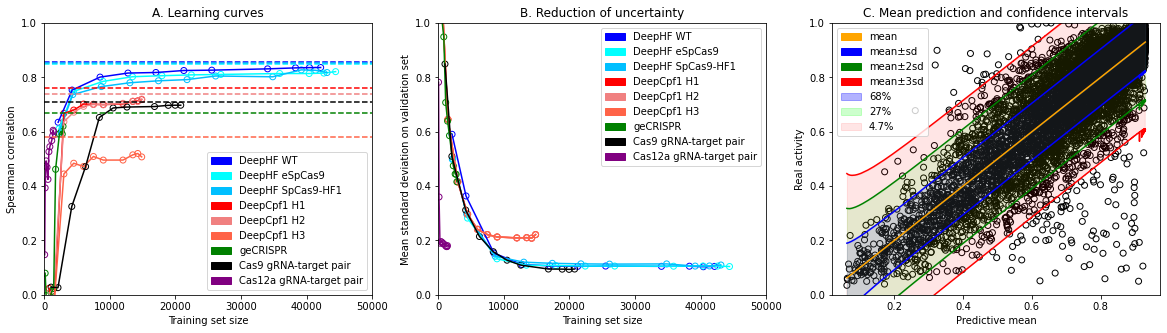

In [23]:
plt.subplot(1,3,1)
plot_A()
plot_lines()
plt.subplot(1,3,2)
plot_B()
plt.subplot(1,3,3)
plot_C()